In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Set a style for the plots
sns.set_style("whitegrid")

In [2]:
# Load the dataset 
try:
    df = pd.read_csv('insurance.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'insurance.csv' not found. Please ensure the file is in the correct directory.")
    # Initialize an empty DataFrame if loading fails
    df = pd.DataFrame()

if not df.empty:
    print("\n--- Dataset Structure and Description ---")
    
    # Display structure
    print(f"Shape of the dataset: {df.shape}")
    print("\nColumns and Data Types:")
    df.info()
    
    # Display first 5 rows
    print("\nFirst 5 rows of the dataset:")
    display(df.head())
    
    # Summary statistics of numerical features
    print("\nSummary statistics of the dataset:")
    display(df.describe())

Dataset loaded successfully!

--- Dataset Structure and Description ---
Shape of the dataset: (1338, 7)

Columns and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

First 5 rows of the dataset:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Summary statistics of the dataset:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [3]:
if not df.empty:
    print("\n--- Data Cleaning and Preparation ---")
    
    # 3.1 Handling Missing Values
    print("Missing values in each column:")
    missing_values = df.isnull().sum()
    print(missing_values)
    
    if missing_values.sum() == 0:
        print("\nConclusion: No missing values detected. Data is very clean.")
        
    # 3.2 Encoding Categorical Variables
    
    # Label Encoding for binary features (sex, smoker)
    le = LabelEncoder()
    df['sex'] = le.fit_transform(df['sex']) # male=1, female=0
    df['smoker'] = le.fit_transform(df['smoker']) # yes=1, no=0

    # One-Hot Encoding for multi-class features (region)
    df = pd.get_dummies(df, columns=['region'], drop_first=True)
    
    # The 'children' column is ordinal and already numeric, so no change is needed.

    print("\nFinal processed data head:")
    display(df.head())


--- Data Cleaning and Preparation ---
Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Conclusion: No missing values detected. Data is very clean.

Final processed data head:


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False



--- Exploratory Data Analysis (EDA) ---


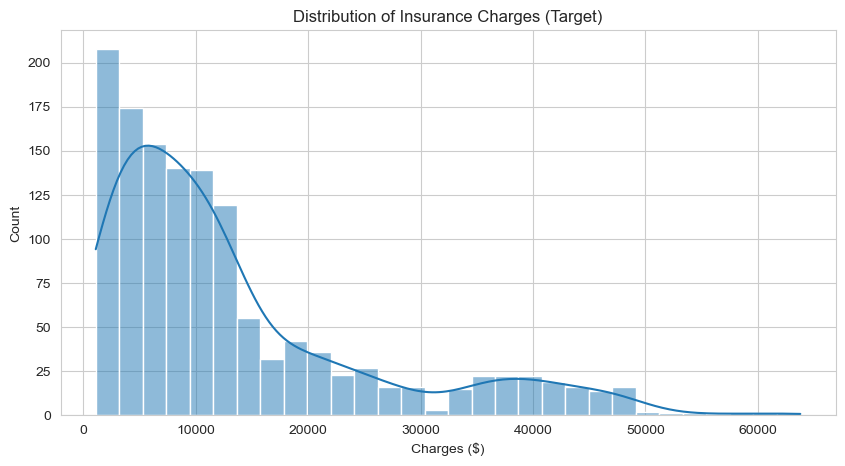

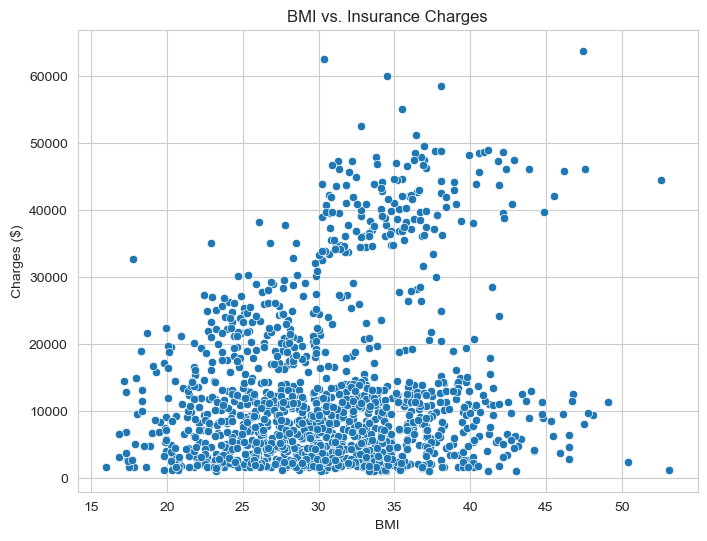

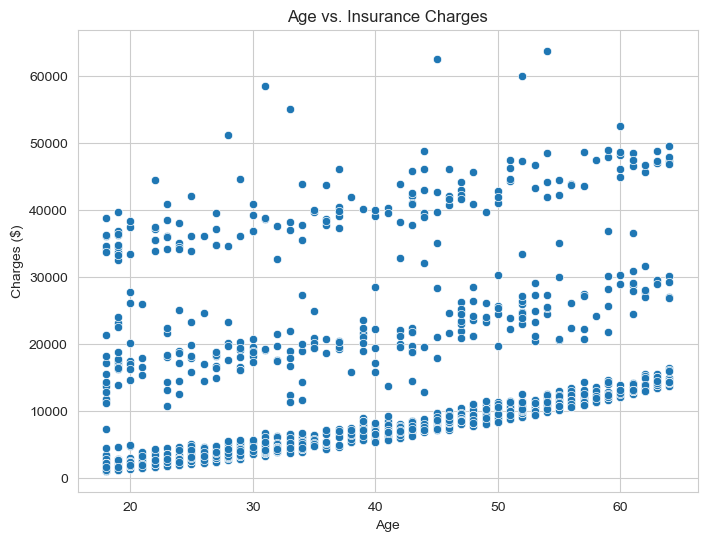

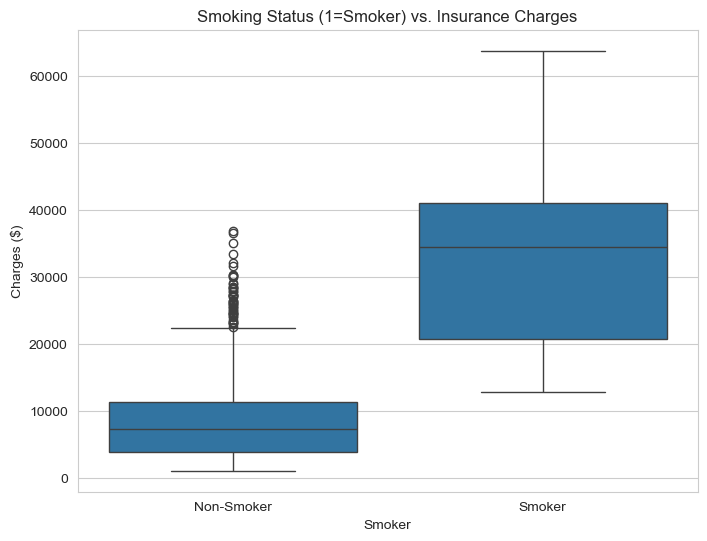

In [4]:
if not df.empty:
    print("\n--- Exploratory Data Analysis (EDA) ---")
    
    # 4.1 Distribution of Charges (Target Variable)
    plt.figure(figsize=(10, 5))
    sns.histplot(df['charges'], bins=30, kde=True)
    plt.title('Distribution of Insurance Charges (Target)')
    plt.xlabel('Charges ($)')
    plt.show()
    # Note: The charges distribution is highly skewed, suggesting log transformation might be beneficial for modeling, but we'll stick to simple Linear Regression first.

    ## Visualizing Key Feature Impacts: BMI, Age, Smoker
    
    # 4.2 Impact of BMI on Charges
    # Use a scatter plot to show relationship and potential non-linearity
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='bmi', y='charges', data=df)
    plt.title('BMI vs. Insurance Charges')
    plt.xlabel('BMI')
    plt.ylabel('Charges ($)')
    plt.show()
    
    # 4.3 Impact of Age on Charges
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='age', y='charges', data=df)
    plt.title('Age vs. Insurance Charges')
    plt.xlabel('Age')
    plt.ylabel('Charges ($)')
    plt.show()
    
    # 4.4 Impact of Smoking Status on Charges (Categorical)
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='smoker', y='charges', data=df)
    plt.title('Smoking Status (1=Smoker) vs. Insurance Charges')
    plt.xlabel('Smoker')
    plt.ylabel('Charges ($)')
    plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
    plt.show() 
    # 
    # Insight: Smoking status appears to be the most dominant factor, causing a massive increase in mean and variance of charges.

In [5]:
if not df.empty:
    print("\n--- Model Training and Testing (Linear Regression) ---")
    
    # 5.1 Define Features (X) and Target (y)
    # Drop the original 'sex' column as we used the encoded one
    X = df.drop('charges', axis=1)
    y = df['charges']

    # 5.2 Split Data (70% Train, 30% Test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # 5.3 Initialize and Train the Model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)

    print("Linear Regression Model Training Complete.")

    # 5.4 Make Predictions
    y_pred = lin_reg.predict(X_test)


--- Model Training and Testing (Linear Regression) ---
Linear Regression Model Training Complete.



--- Evaluation Metrics ---
Mean Absolute Error (MAE): $4,145.45
Root Mean Squared Error (RMSE): $5,812.10
R-squared (R²): 0.7696


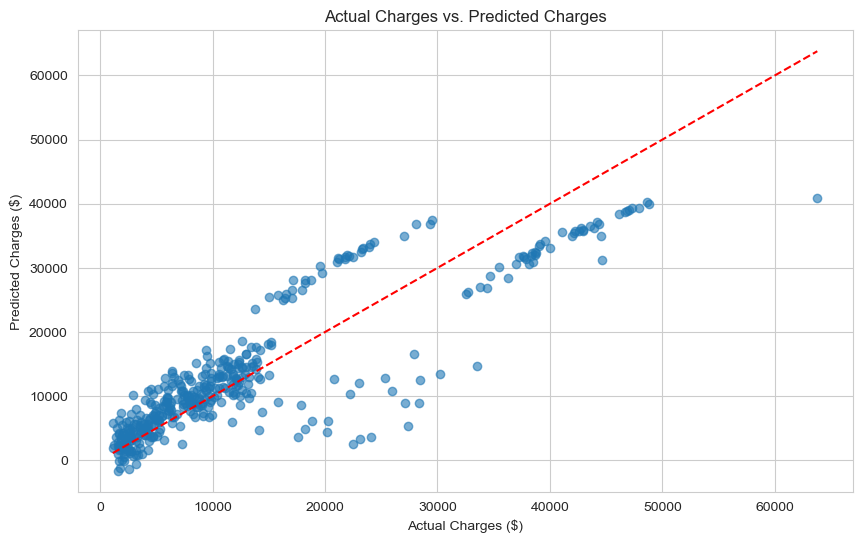

In [6]:
if 'lin_reg' in locals():
    print("\n--- Evaluation Metrics ---")
    
    # Calculate MAE
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
    
    # R-squared Score (Optional, but useful for regression)
    r2_score = lin_reg.score(X_test, y_test)
    print(f"R-squared (R²): {r2_score:.4f}")
    
    # Visualize Actual vs. Predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Diagonal line for perfect prediction
    plt.title('Actual Charges vs. Predicted Charges')
    plt.xlabel('Actual Charges ($)')
    plt.ylabel('Predicted Charges ($)')
    plt.show()

In [7]:
print("\n--- Conclusion ---")
print("1. Data Preparation: The dataset was clean, requiring only the **encoding of categorical variables** (sex, smoker, region) for use with Linear Regression.")
print("2. EDA Insights:")
print("   - **Smoking Status** is the most significant predictor. Smokers incur substantially higher insurance charges.")
print("   - **Age** shows a positive linear correlation with charges; costs generally increase as individuals get older.")
print("   - **BMI** has a less defined linear relationship with charges overall but shows groups of high-cost individuals at higher BMI levels, especially among smokers.")
print(f"3. Model Performance: The Linear Regression model achieved an R² score of **{r2_score:.4f}** on the test set, indicating it explains a large portion of the variance in charges.")
print(f"4. Error Analysis: The model's predictions are, on average, off by **${mae:,.2f} (MAE)**. The **RMSE** of **${rmse:,.2f}** is higher, indicating the model has larger errors on some of the extreme charge predictions (likely the high-cost smoker group).")
print("\nTask Complete: Data prepared, features visualized, model trained, and evaluated.")


--- Conclusion ---
1. Data Preparation: The dataset was clean, requiring only the **encoding of categorical variables** (sex, smoker, region) for use with Linear Regression.
2. EDA Insights:
   - **Smoking Status** is the most significant predictor. Smokers incur substantially higher insurance charges.
   - **Age** shows a positive linear correlation with charges; costs generally increase as individuals get older.
   - **BMI** has a less defined linear relationship with charges overall but shows groups of high-cost individuals at higher BMI levels, especially among smokers.
3. Model Performance: The Linear Regression model achieved an R² score of **0.7696** on the test set, indicating it explains a large portion of the variance in charges.
4. Error Analysis: The model's predictions are, on average, off by **$4,145.45 (MAE)**. The **RMSE** of **$5,812.10** is higher, indicating the model has larger errors on some of the extreme charge predictions (likely the high-cost smoker group).

T